# Ellipsoidal nested sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

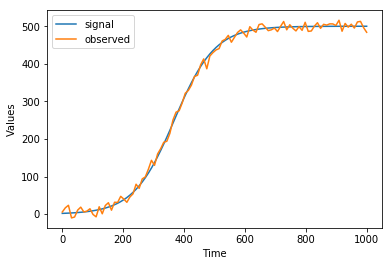

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedController(log_likelihood, log_prior, method=pints.NestedEllipsoidSampler)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

# Do proposals in parallel
sampler.set_parallel(True)

# Use dynamic enlargement factor
sampler._sampler.set_dynamic_enlargement_factor(1)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested ellipsoidal sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:01.2 -inf          1             
0     2       0:01.2 -inf          1             
0     3       0:01.2 -inf          1             
0     4       0:01.2 -inf          1             
0     5       0:01.2 -inf          1             
0     21      0:01.3 -inf          1             
0     41      0:01.3 -inf          1             
0     61      0:01.3 -inf          1             
0     81      0:01.4 -inf          1             
0     101     0:01.4 -inf          1             
0     121     0:01.5 -inf          1             
0     141     0:01.5 -inf          1             
0     161     0:01.5 -inf          1             
0     181     0:01.6 -inf          1             
0     201     0:01.6 -inf          1             
0     221     0:01.6 -inf          1             
0     241    

3200  6124    0:10.3 -25.37280959  0.489343117   
3220  6148    0:10.5 -24.71139696  0.490779401531
3240  6172    0:10.5 -24.05879218  0.492203742   
3260  6196    0:10.6 -23.47545755  0.493616287   
3280  6228    0:10.6 -22.94401057  0.49433768    
3300  6272    0:10.6 -22.37684292  0.49403951    
3320  6296    0:10.7 -21.86256498  0.495420624152
3340  6320    0:10.7 -21.36376862  0.496790541   
3360  6352    0:10.7 -20.84366516  0.497479839   
3380  6380    0:10.8 -20.32321923  0.498494983   
3400  6408    0:10.8 -19.84013769  0.499500665779
3420  6428    0:10.8 -19.38529126  0.501161248   
3440  6460    0:10.9 -18.84928885  0.501815182   
3460  6488    0:10.9 -18.35627169  0.502792378   
3480  6516    0:10.9 -17.90573457  0.503760628   
3500  6548    0:10.9 -17.50139039  0.504391672   
3520  6572    0:11.0 -17.07996583  0.505670771   
3540  6600    0:11.2 -16.62060423  0.506612903   
3560  6624    0:11.2 -16.18148938  0.507872751   
3580  6656    0:11.2 -15.74501987  0.508471867   


## Plot posterior samples versus true parameter values (dashed lines)

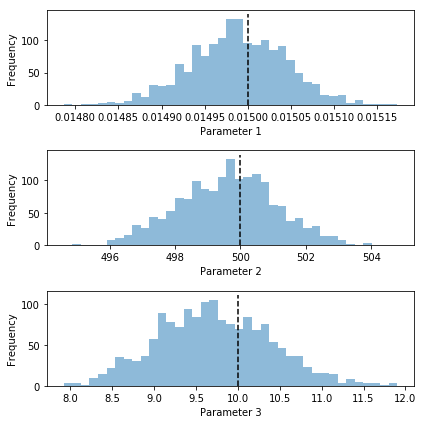

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

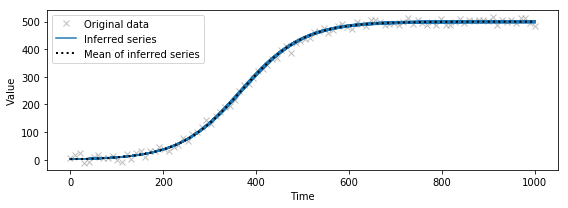

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -378.564837383 ± 0.078601761758


## Effective sample size

In [7]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1601.53120503
